In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings 
import missingno as msno
from sklearn.model_selection import train_test_split
import datasist

%matplotlib inline
sns.set(rc={'figure.figsize':[10,10]},font_scale = 1.3)

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('datasets/titanic_data.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

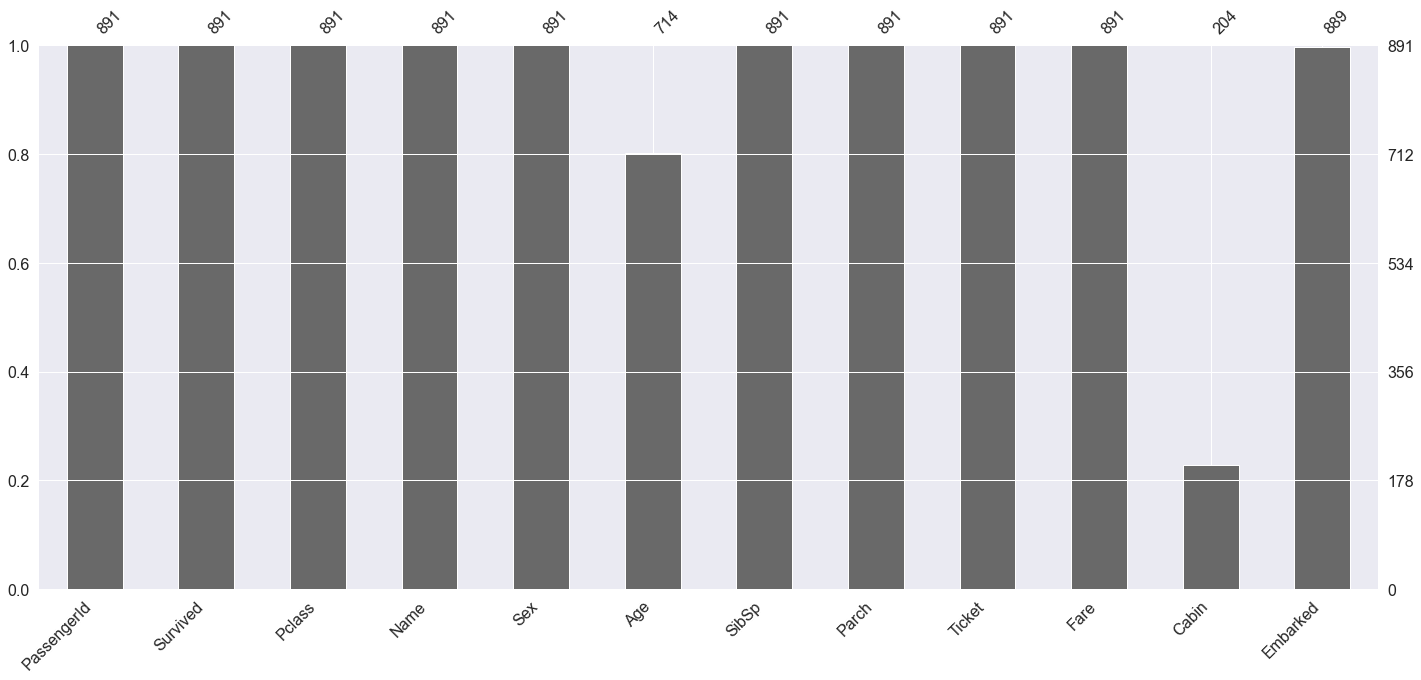

In [6]:
msno.bar(df)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Name'].value_counts()

Ahlin, Mrs. Johan (Johanna Persdotter Larsson)    1
Porter, Mr. Walter Chamberlain                    1
Graham, Mrs. William Thompson (Edith Junkins)     1
Rice, Master. Eugene                              1
Oreskovic, Miss. Marija                           1
                                                 ..
Levy, Mr. Rene Jacques                            1
Widegren, Mr. Carl/Charles Peter                  1
Maioni, Miss. Roberta                             1
Giles, Mr. Frederick Edward                       1
Montvila, Rev. Juozas                             1
Name: Name, Length: 891, dtype: int64

In [9]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [10]:
df['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
F2             3
              ..
B69            1
B73            1
C54            1
C87            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [11]:
df['Ticket'].value_counts()

347082      7
1601        7
CA. 2343    7
3101295     6
347088      6
           ..
3101264     1
374910      1
345783      1
36209       1
350048      1
Name: Ticket, Length: 681, dtype: int64

In [12]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

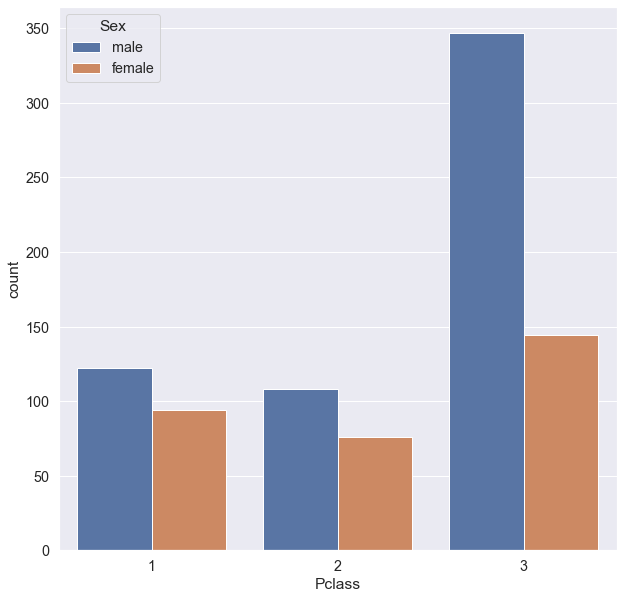

In [13]:
sns.countplot(df['Pclass'],hue=df['Sex'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

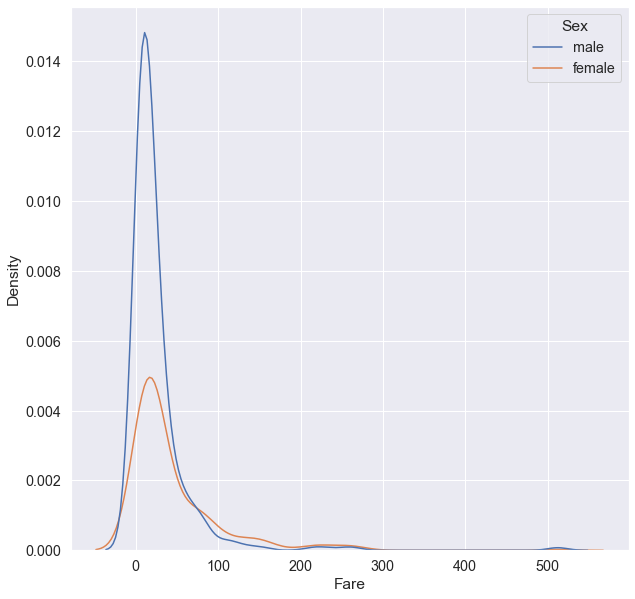

In [14]:
sns.kdeplot(df['Fare'],hue=df['Sex'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

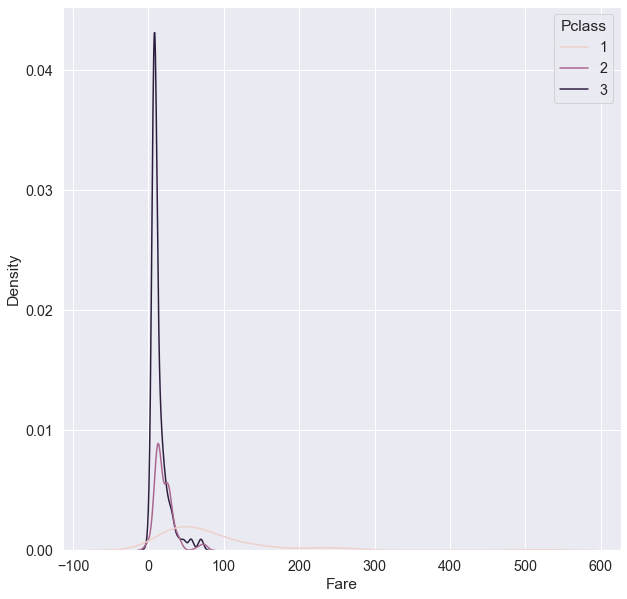

In [15]:
sns.kdeplot(df['Fare'],hue=df['Pclass'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

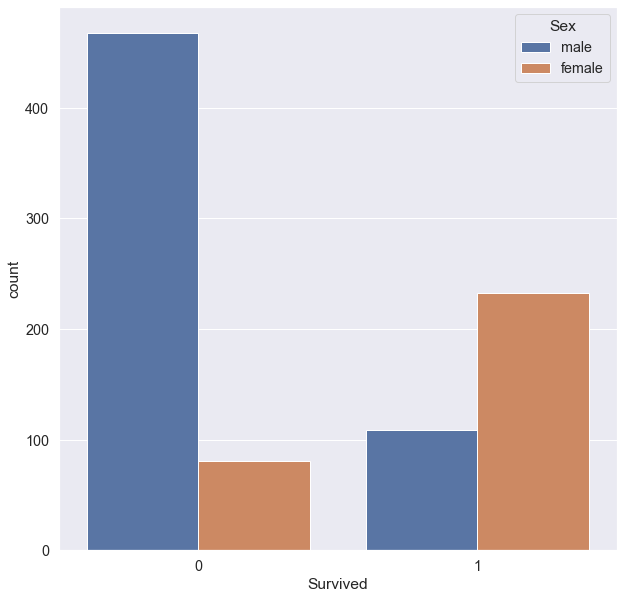

In [16]:
sns.countplot(df['Survived'],hue=df['Sex'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

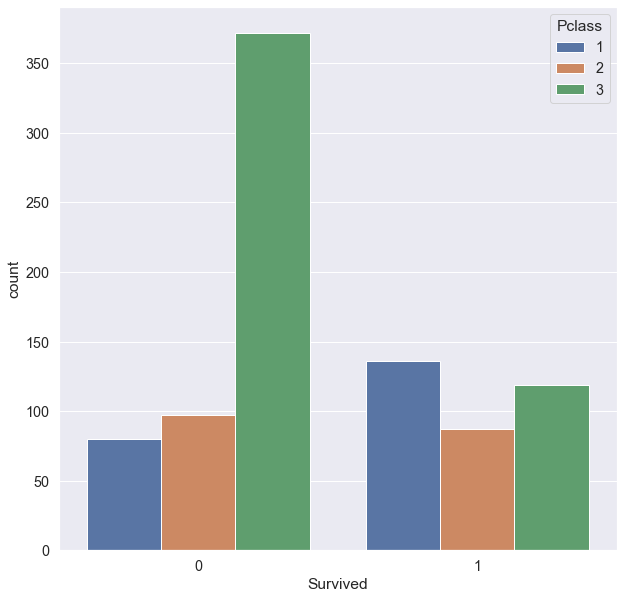

In [17]:
sns.countplot(df['Survived'],hue=df['Pclass'])

In [18]:
df['Male'] = pd.get_dummies(df['Sex'],drop_first=True)

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [20]:
df.drop('Sex',axis=1,inplace=True)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

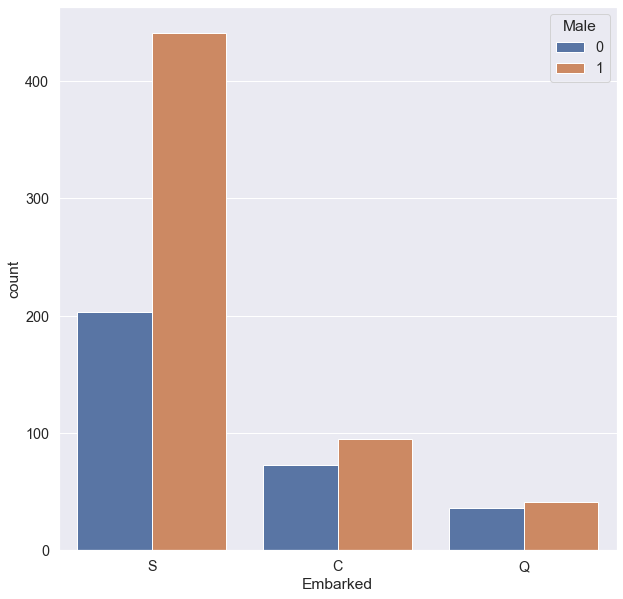

In [21]:
sns.countplot(df['Embarked'],hue=df['Male'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

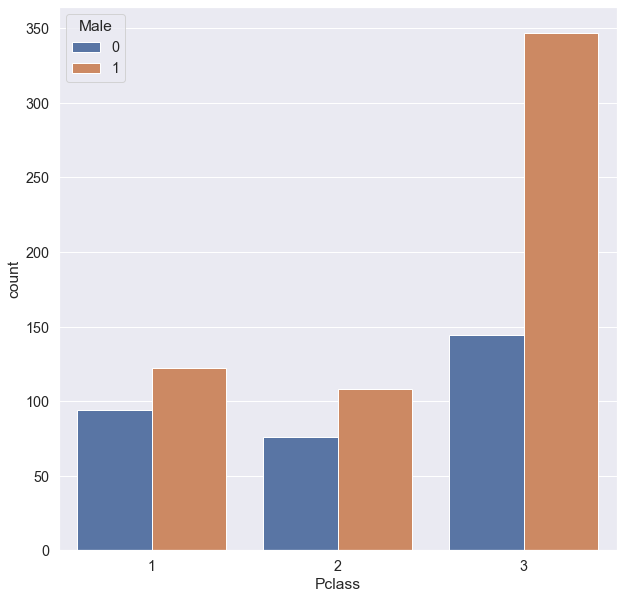

In [22]:
sns.countplot(df['Pclass'],hue=df['Male'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

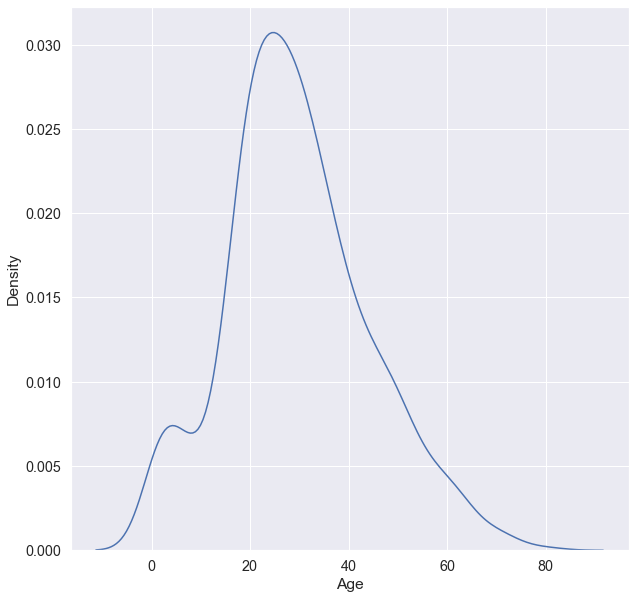

In [23]:
sns.kdeplot(df['Age'])

<AxesSubplot:xlabel='Male', ylabel='Fare'>

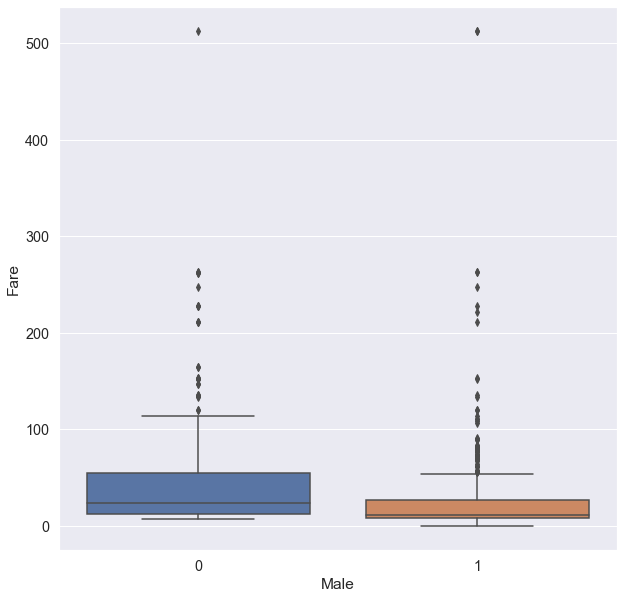

In [24]:
sns.boxplot(x = df['Male'],y = df['Fare'])

In [25]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

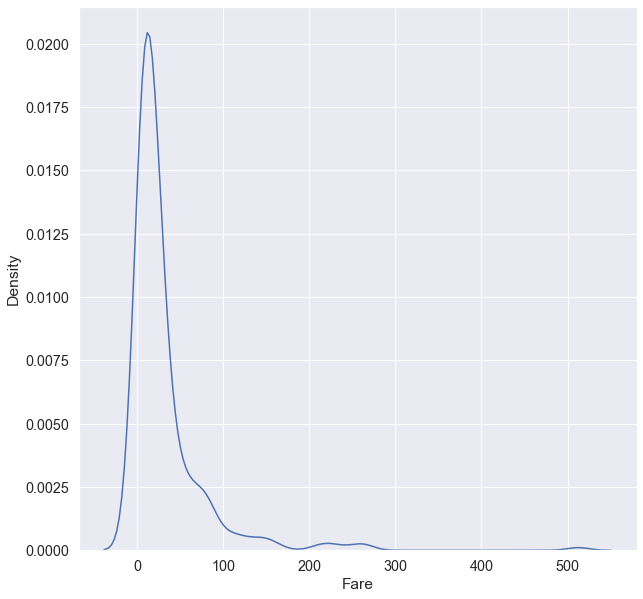

In [26]:
sns.kdeplot(df['Fare'])

In [27]:
df['Age'].mode()

0    24.0
dtype: float64

In [28]:
df['Age'].median()

28.0

<AxesSubplot:xlabel='Age'>

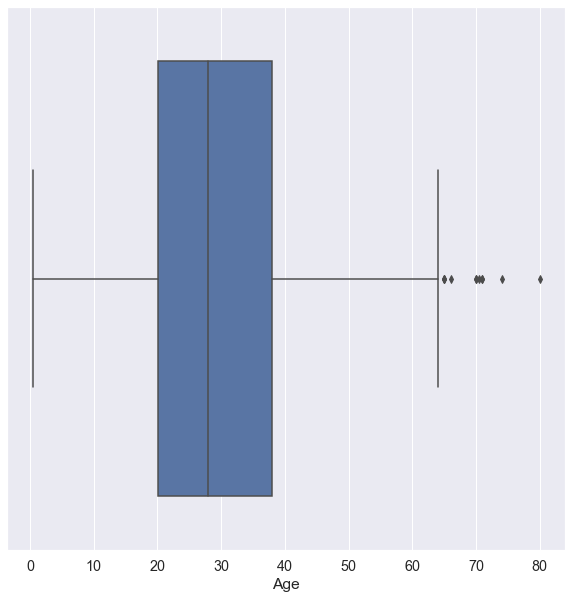

In [29]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

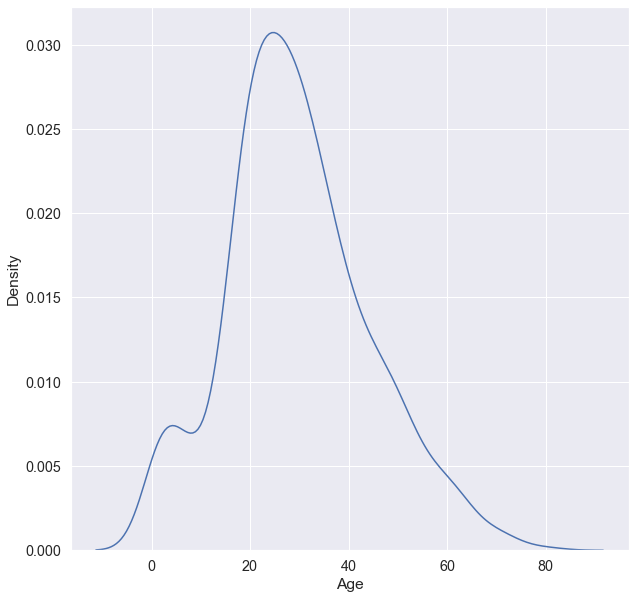

In [30]:
sns.kdeplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

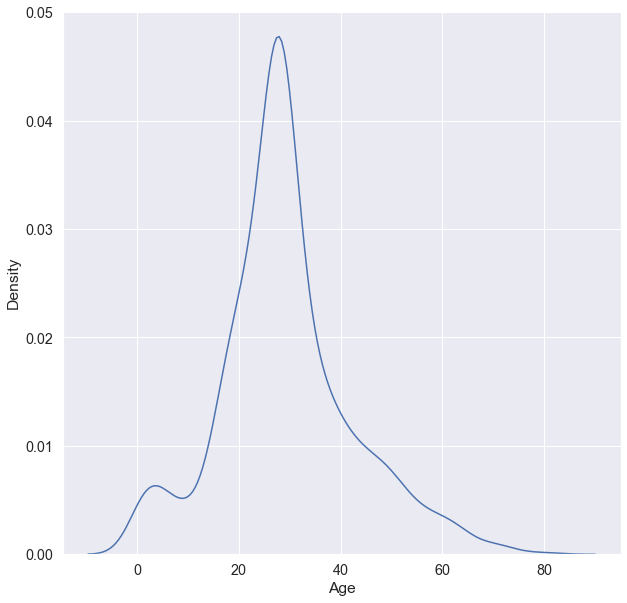

In [31]:
sns.kdeplot(df['Age'].fillna(df['Age'].median()))

In [32]:
df['Age'].fillna(df['Age'].median(),inplace=True)

<AxesSubplot:xlabel='Age'>

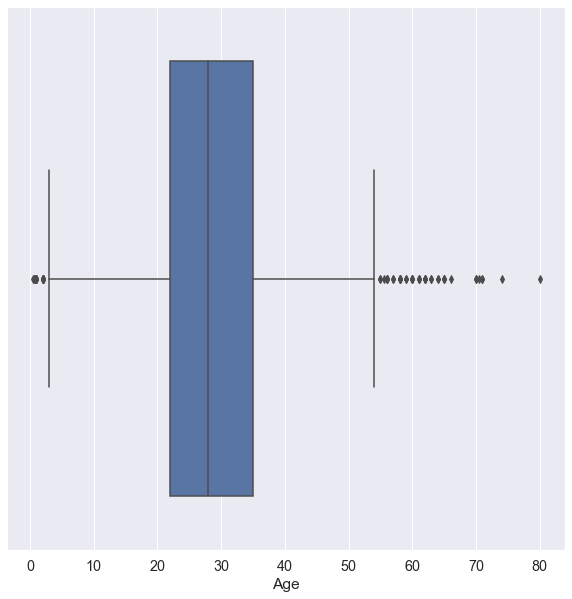

In [33]:
sns.boxplot(df['Age'])

In [34]:
x = df[['Fare','Age','Pclass','Male','SibSp']]
y = df['Survived']

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Male         891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(1)
memory usage: 77.6+ KB


In [36]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 42)

In [37]:
from sklearn.svm import SVC

In [38]:
model = SVC()

In [39]:
model.fit(x_train,y_train)

SVC()

In [40]:
y_pred = model.predict(x_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [42]:
accuracy_score(y_test,y_pred)

0.6567164179104478

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
model = DecisionTreeClassifier()

In [45]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
y_pred = model.predict(x_test)

In [47]:
accuracy_score(y_test,y_pred)

0.753731343283582

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [49]:
model = RandomForestClassifier()

In [50]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
y_pred = model.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred)

0.7985074626865671

In [53]:
model = LogisticRegression()

In [54]:
model.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred = model.predict(x_test)

In [56]:
accuracy_score(y_test,y_pred)

0.8022388059701493

In [57]:
from xgboost import XGBClassifier

In [58]:
model = XGBClassifier()

In [59]:
model.fit(x_train,y_train)

[19:35:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
y_pred = model.predict(x_test)

In [61]:
accuracy_score(y_test,y_pred)

0.8059701492537313